In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("C:/Users/lenovo/Desktop/乳腺癌诊断数据集/wisc_bc_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [2]:
data.drop("id",axis = 1,inplace=True)
data['diagnosis'] = data['diagnosis'].replace(['M','B'],[1, 0])

In [3]:
features_mean,features_se,features_worst =[],[],[]
for feat in data.columns:
    if "mean" in feat:
        features_mean.append(feat)
    elif "se" in feat:
        features_se.append(feat)
    elif "worst" in feat:
        features_worst.append(feat)

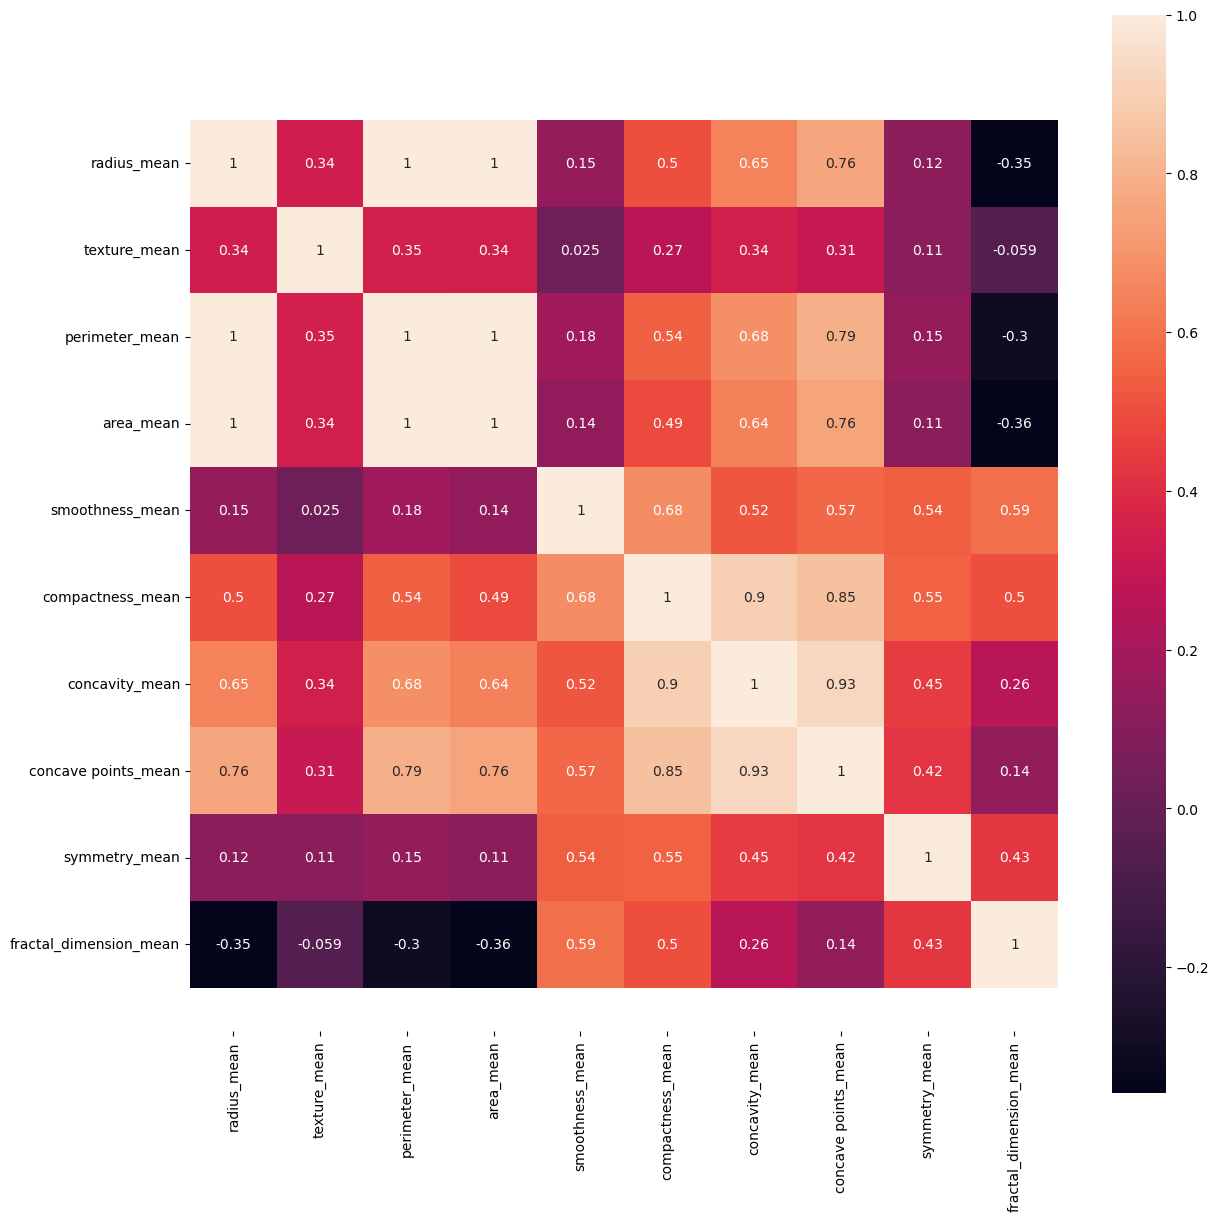

In [4]:
corr_mean = data[features_mean].corr(method="spearman")
plt.figure(figsize=(14,14))
ax_mean = sn.heatmap(corr_mean, square=True, annot=True)
bottom, top = ax_mean.get_ylim()
ax_mean.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

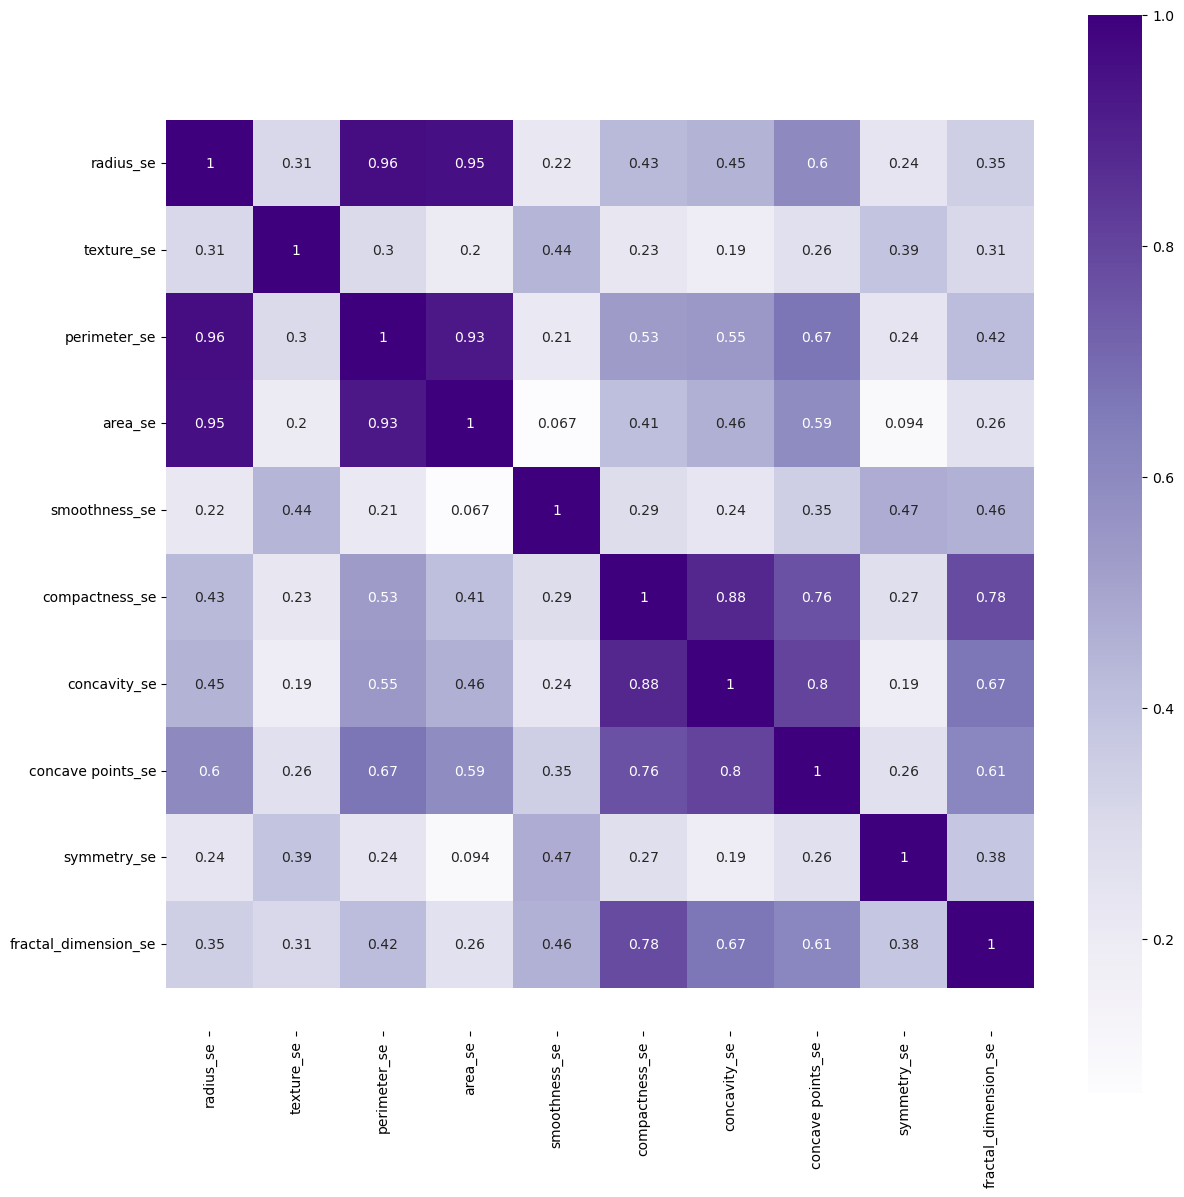

In [5]:
corr_se = data[features_se].corr(method="spearman")
plt.figure(figsize=(14,14))
ax_se = sn.heatmap(corr_se, square=True, annot=True, cmap="Purples")
bottom, top = ax_se.get_ylim()
ax_se.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

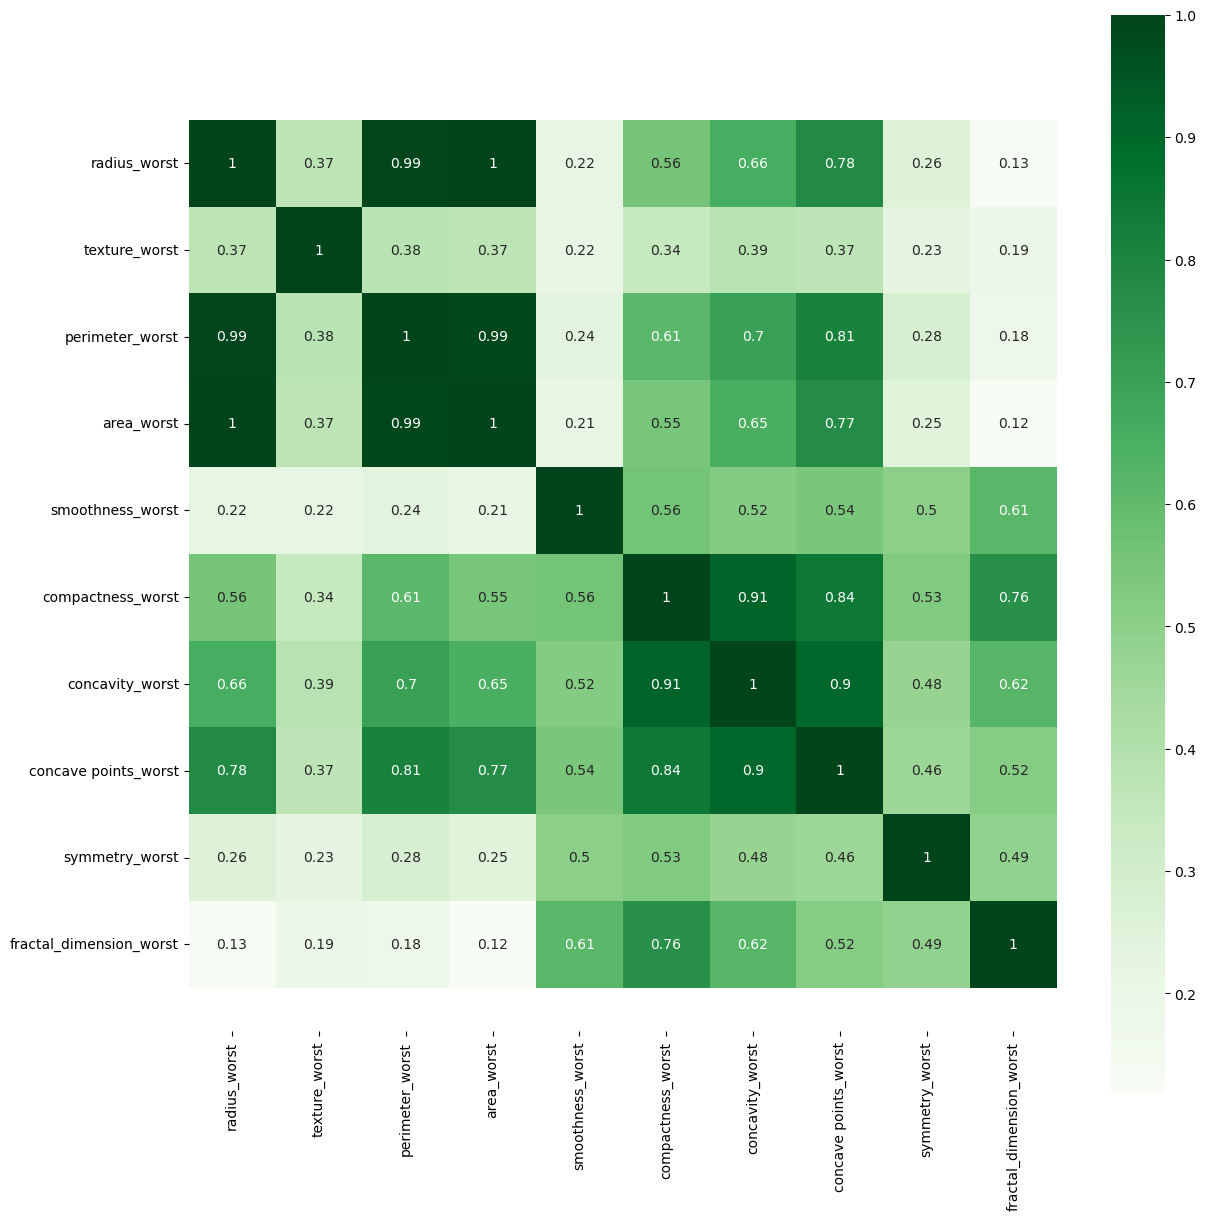

In [6]:
corr_worst = data[features_worst].corr(method="spearman")
plt.figure(figsize=(14,14))
ax_worst = sn.heatmap(corr_worst, square=True, annot=True, cmap="Greens")
bottom, top = ax_worst.get_ylim()
ax_worst.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [7]:
columns_to_drop = ["perimeter_mean", "perimeter_se", "perimeter_worst", "area_mean", "area_se", "area_worst", "compactness_mean", "compactness_se", "compactness_worst", "concave points_mean", "concave points_se", "concave points_worst"]
data_new = data.drop(columns_to_drop, axis=1)

In [8]:
data_mean,data_se,data_worst = [],[],[]
for feat in data_new.columns:
    if "mean" in feat:
        data_mean.append(feat)
    elif "se" in feat:
        data_se.append(feat)
    elif "worst" in feat:
        data_worst.append(feat)
print(data_mean)
print(data_se)
print(data_worst)

['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']
